In [2]:
from xgboost import XGBRegressor as XGBR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.linear_model import LinearRegression as LinearR
from sklearn.datasets import load_boston
from sklearn.model_selection import KFold, cross_val_score as CVS, train_test_split as TTS
from sklearn.metrics import mean_squared_error as MSE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from time import time
import datetime

In [3]:
data = load_boston()
#波士顿数据集非常简单，但它所涉及到的问题却很多

In [4]:
data

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [5]:
X = data.data
y = data.target

In [6]:
X.shape

(506, 13)

In [7]:
y.shape

(506,)

In [8]:
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [9]:
Xtrain,Xtest,Ytrain,Ytest = TTS(X,y,test_size=0.3,random_state=420)

In [10]:
reg = XGBR(n_estimators=100).fit(Xtrain,Ytrain) #训练

In [11]:
reg.predict(Xtest) #传统接口predict

array([ 6.6689262, 22.34918  , 31.052807 , 13.911593 ,  9.467967 ,
       22.658588 , 14.514282 , 15.092699 , 15.293644 , 12.680115 ,
       24.140797 , 35.890083 , 21.573483 , 27.07066  , 19.052658 ,
        9.89033  , 23.386076 , 23.588493 , 23.311466 , 22.401644 ,
       18.98444  , 15.766946 , 25.8352   , 20.193802 , 19.982517 ,
       15.611423 , 22.883228 , 29.838228 , 22.815304 , 16.779034 ,
       37.13194  , 20.133307 , 19.67352  , 23.525528 , 22.845137 ,
       23.87397  , 15.17887  , 23.45934  , 16.685331 , 31.761686 ,
       18.525843 , 22.441063 , 38.48728  , 17.93719  , 15.10122  ,
       28.980541 , 46.363487 , 12.842797 ,  9.618281 , 35.40579  ,
       25.657566 , 20.605602 , 20.800055 , 49.228447 , 31.355848 ,
       29.382515 , 18.911947 , 21.049877 , 16.165169 , 18.098577 ,
       14.659002 , 21.720213 , 19.413454 , 28.932102 , 30.573524 ,
       19.228426 , 20.531511 , 15.666288 , 23.52929  , 19.30554  ,
       28.384985 , 42.83562  , 29.429724 , 23.306015 , 19.7412

In [12]:
reg.score(Xtest,Ytest) #R^2评估指标

0.9050988954757183

In [13]:
y.mean()

22.532806324110677

In [14]:
MSE(Ytest,reg.predict(Xtest))#可以看出均方误差是平均值y.mean()的1/3左右，结果不算好也不算坏

8.830916470718748

In [15]:
reg.feature_importances_ #树模型的优势之一：能够查看模型的重要性分数，可以使用嵌入法(SelectFromModel)进行特征选择
#xgboost可以使用嵌入法进行特征选择

array([0.01902167, 0.0042109 , 0.01478317, 0.00553536, 0.02222195,
       0.37914094, 0.01679687, 0.04698721, 0.04073574, 0.05491758,
       0.0668422 , 0.00869463, 0.32011184], dtype=float32)

In [16]:
reg = XGBR(n_estimators=100) #交叉验证中导入的没有经过训练的模型

In [17]:
CVS(reg,Xtrain,Ytrain,cv=5).mean()
#这里返回的是与reg.score相同的评估指标R^2（回归），准确率（分类）

0.799506280269948

In [18]:
CVS(reg,Xtrain,Ytrain,cv=5,scoring='neg_mean_squared_error').mean()    #手动指定负均方误差指标

-16.215644658473447

In [19]:
#来查看一下sklearn中所有的模型评估指标
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

In [20]:
#使用随机森林和线性回归进行一个对比
rfr = RFR(n_estimators=100)
CVS(rfr,Xtrain,Ytrain,cv=5).mean()

0.7974025444844013

In [21]:
CVS(rfr,Xtrain,Ytrain,cv=5,scoring='neg_mean_squared_error').mean()

-16.846132899396373

In [22]:
lr = LinearR()
CVS(lr,Xtrain,Ytrain,cv=5).mean()

0.6835070597278076

In [23]:
CVS(lr,Xtrain,Ytrain,cv=5,scoring='neg_mean_squared_error').mean()

-25.349507493648485

In [24]:
#如果开启参数slient：在数据巨大，预料到算法运行会非常缓慢的时候可以使用这个参数来监控模型的训练进度
reg = XGBR(n_estimators=10,silent=True)#xgboost库silent=True不会打印训练进程，只返回运行结果，默认是False会打印训练进程
#sklearn库中的xgbsoost的默认为silent=True不会打印训练进程，想打印需要手动设置为False
CVS(reg,Xtrain,Ytrain,cv=5,scoring='neg_mean_squared_error').mean()

-18.63373361656663

In [25]:
def plot_learning_curve(estimator,title, X, y, 
                        ax=None, #选择子图
                        ylim=None, #设置纵坐标的取值范围
                        cv=None, #交叉验证
                        n_jobs=None #设定索要使用的线程
                       ):
    
    from sklearn.model_selection import learning_curve
    import matplotlib.pyplot as plt
    import numpy as np
    
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y
                                                            ,shuffle=True
                                                            ,cv=cv
                                                            ,random_state=420
                                                            ,n_jobs=n_jobs)      
    if ax == None:
        ax = plt.gca()
    else:
        ax = plt.figure()
    ax.set_title(title)
    if ylim is not None:
        ax.set_ylim(*ylim)
    ax.set_xlabel("Training examples")
    ax.set_ylabel("Score")
    ax.grid() #绘制网格，不是必须
    ax.plot(train_sizes, np.mean(train_scores, axis=1), 'o-'
            , color="r",label="Training score")
    ax.plot(train_sizes, np.mean(test_scores, axis=1), 'o-'
            , color="g",label="Test score")
    ax.legend(loc="best")
    return ax

In [26]:
cv = KFold(n_splits=5, shuffle = True, random_state=42) #交叉验证模式

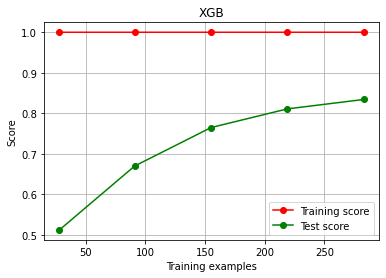

In [27]:
plot_learning_curve(XGBR(n_estimators=100,random_state=420)
                    ,"XGB",Xtrain,Ytrain,ax=None,cv=cv)
plt.show()

160 0.8320776685832459


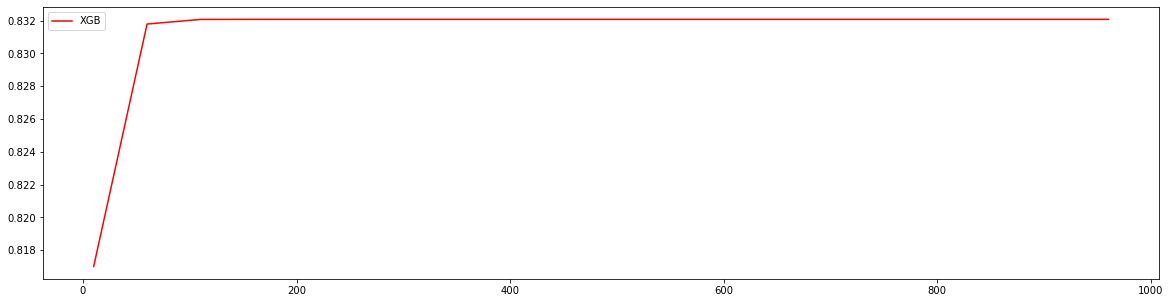

In [28]:
axisx = range(10,1010,50)
rs = []
for i in axisx:
    reg = XGBR(n_estimators=i,random_state=420)
    rs.append(CVS(reg,Xtrain,Ytrain,cv=cv).mean())
print(axisx[rs.index(max(rs))],max(rs))
plt.figure(figsize=(20,5))
plt.plot(axisx,rs,c="red",label="XGB")
plt.legend()
plt.show()

100 0.8320924479019667 0.005344209691331517
100 0.8320924479019667 0.005344209691331517
100 0.8320924479019667 0.005344209691331517 0.03353715574288529


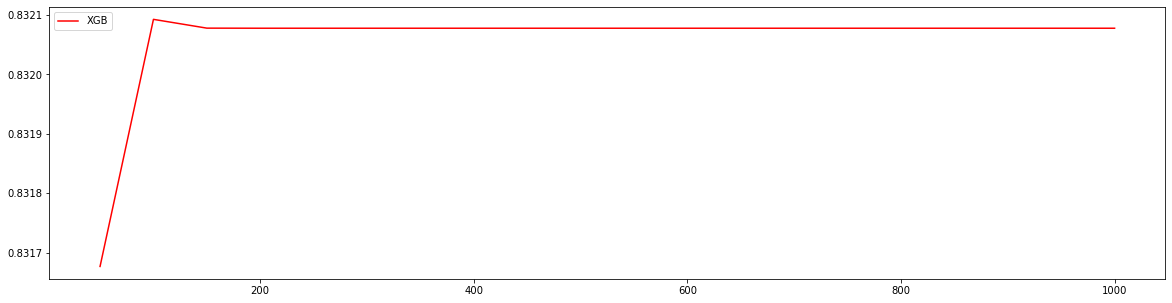

In [29]:
axisx = range(50,1050,50)
rs = []
var = []
ge = []
for i in axisx:
    reg = XGBR(n_estimators=i,random_state=420)
    cvresult = CVS(reg,Xtrain,Ytrain,cv=cv)
    #记录1-偏差
    rs.append(cvresult.mean())
    #记录方差
    var.append(cvresult.var())
    #计算泛化误差的可控部分
    ge.append((1 - cvresult.mean())**2+cvresult.var())
#打印R2最高所对应的参数取值，并打印这个参数下的方差
print(axisx[rs.index(max(rs))],max(rs),var[rs.index(max(rs))])
#打印方差最低时对应的参数取值，并打印这个参数下的R2
print(axisx[var.index(min(var))],rs[var.index(min(var))],min(var))
#打印泛化误差可控部分的参数取值，并打印这个参数下的R2，方差以及泛化误差的可控部分
print(axisx[ge.index(min(ge))],rs[ge.index(min(ge))],var[ge.index(min(ge))],min(ge))
plt.figure(figsize=(20,5))
plt.plot(axisx,rs,c="red",label="XGB")
plt.legend()
plt.show()

100 0.8320924479019667 0.005344209691331517
100 0.8320924479019667 0.005344209691331517
100 0.8320924479019667 0.005344209691331517 0.03353715574288529


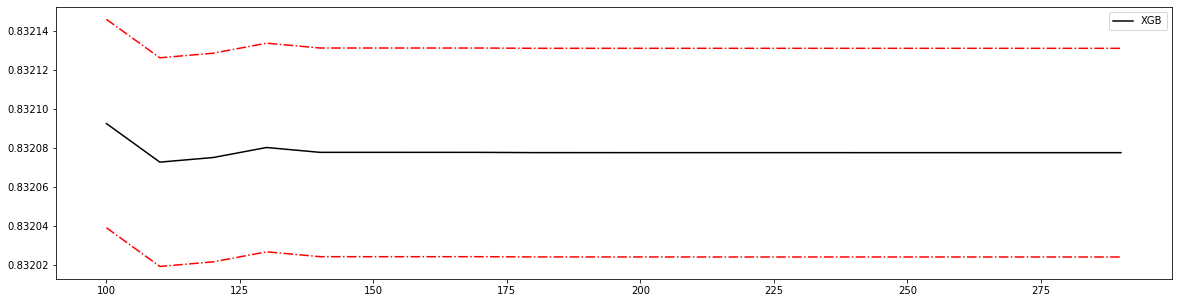

In [30]:
axisx = range(100,300,10)
rs = []
var = []
ge = []
for i in axisx:
    reg = XGBR(n_estimators=i,random_state=420)
    cvresult = CVS(reg,Xtrain,Ytrain,cv=cv)
    rs.append(cvresult.mean())
    var.append(cvresult.var())
    ge.append((1 - cvresult.mean())**2+cvresult.var())
print(axisx[rs.index(max(rs))],max(rs),var[rs.index(max(rs))])
print(axisx[var.index(min(var))],rs[var.index(min(var))],min(var))
print(axisx[ge.index(min(ge))],rs[ge.index(min(ge))],var[ge.index(min(ge))],min(ge))
rs = np.array(rs)
var = np.array(var)*0.01
plt.figure(figsize=(20,5))
plt.plot(axisx,rs,c="black",label="XGB")
#添加方差线
plt.plot(axisx,rs+var,c="red",linestyle='-.')
plt.plot(axisx,rs-var,c="red",linestyle='-.')
plt.legend()
plt.show()

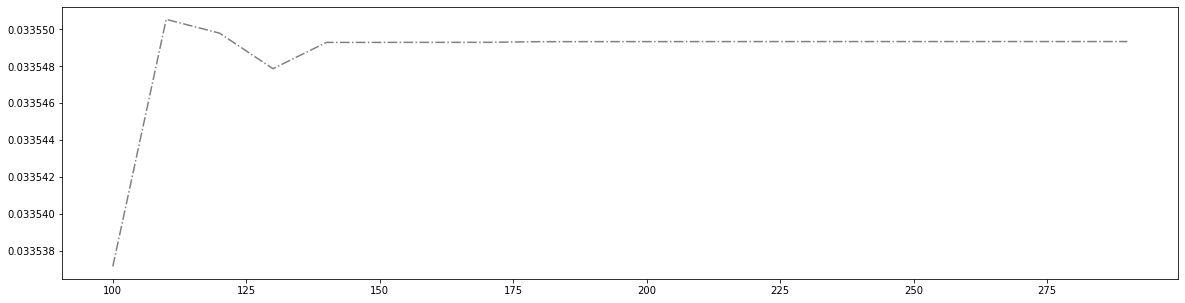

In [31]:
#看看泛化误差的可控部分如何？
plt.figure(figsize=(20,5))
plt.plot(axisx,ge,c="gray",linestyle='-.')
plt.show()

In [32]:
#验证模型效果是否提高了？
time0 = time()
print(XGBR(n_estimators=100,random_state=420).fit(Xtrain,Ytrain).score(Xtest,Ytest))
print(time()-time0)

0.9050988954757183
0.14061760902404785


In [33]:
time0 = time()
print(XGBR(n_estimators=660,random_state=420).fit(Xtrain,Ytrain).score(Xtest,Ytest))
print(time()-time0)

0.9050526024842831
0.3749871253967285


In [34]:
time0 = time()
print(XGBR(n_estimators=180,random_state=420).fit(Xtrain,Ytrain).score(Xtest,Ytest))
print(time()-time0)

0.9050526024842831
0.20311784744262695


1.0 0.8320775357206376


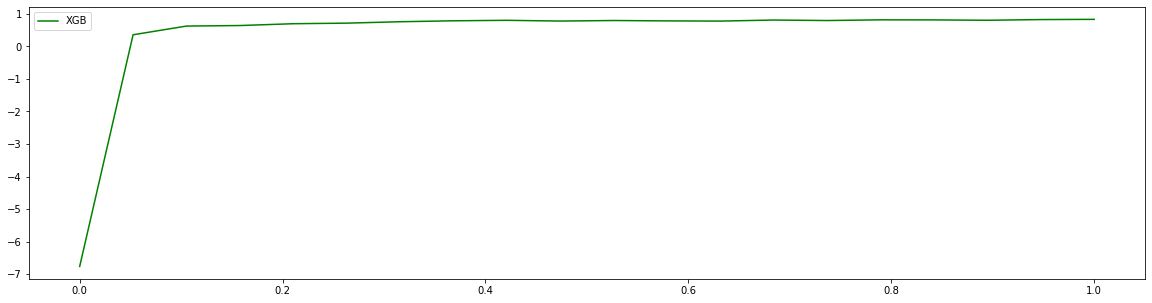

In [35]:
axisx = np.linspace(0,1,20)
rs = []
for i in axisx:
    reg = XGBR(n_estimators=180,subsample=i,random_state=420)
    rs.append(CVS(reg,Xtrain,Ytrain,cv=cv).mean())
print(axisx[rs.index(max(rs))],max(rs))
plt.figure(figsize=(20,5))
plt.plot(axisx,rs,c="green",label="XGB")
plt.legend()
plt.show()

1.0 0.8320775357206376 0.005351385532660411
0.75 0.8173343595502246 0.002674386743068867
1.0 0.8320775357206376 0.005351385532660411 0.033549339542314156


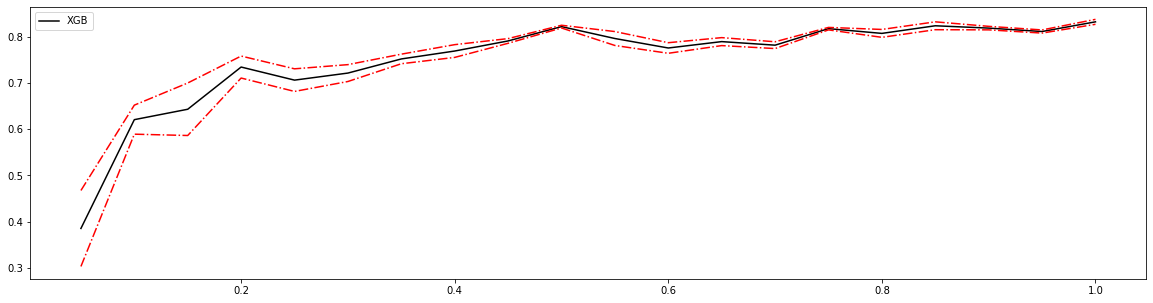

In [36]:
#继续细化学习曲线
axisx = np.linspace(0.05,1,20)
rs = []
var = []
ge = []
for i in axisx:
    reg = XGBR(n_estimators=180,subsample=i,random_state=420)
    cvresult = CVS(reg,Xtrain,Ytrain,cv=cv)
    rs.append(cvresult.mean())
    var.append(cvresult.var())
    ge.append((1 - cvresult.mean())**2+cvresult.var())
print(axisx[rs.index(max(rs))],max(rs),var[rs.index(max(rs))])
print(axisx[var.index(min(var))],rs[var.index(min(var))],min(var))
print(axisx[ge.index(min(ge))],rs[ge.index(min(ge))],var[ge.index(min(ge))],min(ge))
rs = np.array(rs)
var = np.array(var)
plt.figure(figsize=(20,5))
plt.plot(axisx,rs,c="black",label="XGB")
plt.plot(axisx,rs+var,c="red",linestyle='-.')
plt.plot(axisx,rs-var,c="red",linestyle='-.')
plt.legend()
plt.show()

1.0 0.8320775357206376 0.005351385532660411
0.9375 0.8213396576489466 0.002302092087770648
1.0 0.8320775357206376 0.005351385532660411 0.033549339542314156


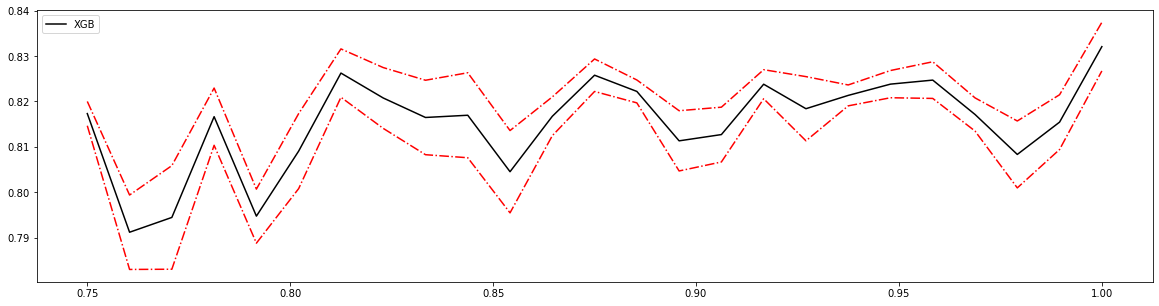

In [37]:
#细化学习曲线
axisx = np.linspace(0.75,1,25)
rs = []
var = []
ge = []
for i in axisx:
    reg = XGBR(n_estimators=180,subsample=i,random_state=420)
    cvresult = CVS(reg,Xtrain,Ytrain,cv=cv)
    rs.append(cvresult.mean())
    var.append(cvresult.var())
    ge.append((1 - cvresult.mean())**2+cvresult.var())
print(axisx[rs.index(max(rs))],max(rs),var[rs.index(max(rs))])
print(axisx[var.index(min(var))],rs[var.index(min(var))],min(var))
print(axisx[ge.index(min(ge))],rs[ge.index(min(ge))],var[ge.index(min(ge))],min(ge))
rs = np.array(rs)
var = np.array(var)
plt.figure(figsize=(20,5))
plt.plot(axisx,rs,c="black",label="XGB")
plt.plot(axisx,rs+var,c="red",linestyle='-.')
plt.plot(axisx,rs-var,c="red",linestyle='-.')
plt.legend()
plt.show()

In [38]:
reg = XGBR(n_estimators=180
         #  ,subsample=0.7708333333333334
           ,random_state=420).fit(Xtrain,Ytrain)
reg.score(Xtest,Ytest)

0.9050526024842831

In [39]:
MSE(Ytest,reg.predict(Xtest))

8.835224213421986

In [40]:
#首先来定义一个评分函数，这个评分函数能够打印Xtrain上的交叉验证结果
def regassess(reg,Xtrain,Ytrain,cv,scoring = ["r2"],show=True):
    score = []
    for i in range(len(scoring)):
        if show:
            print("{}:{:.2f}".format(scoring[i] #模型评估指标的名字
                                     ,CVS(reg
                                          ,Xtrain,Ytrain
                                          ,cv=cv,scoring=scoring[i]).mean()))
        score.append(CVS(reg,Xtrain,Ytrain,cv=cv,scoring=scoring[i]).mean())
    return score

In [41]:
reg = XGBR(n_estimators=180,random_state=420)

In [42]:
regassess(reg,Xtrain,Ytrain,cv,scoring = ["r2","neg_mean_squared_error"])

r2:0.83
neg_mean_squared_error:-12.11


[0.8320775357206378, -12.108526061421776]

In [43]:
regassess(reg,Xtrain,Ytrain,cv,scoring = ["r2","neg_mean_squared_error"],show=False)

[0.8320775357206378, -12.108526061421776]

In [44]:
from time import time
import datetime

for i in [0,0.2,0.5,1]:
    time0=time()
    reg = XGBR(n_estimators=180,random_state=420,learning_rate=i)
    print("learning_rate = {}".format(i))
    regassess(reg,Xtrain,Ytrain,cv,scoring = ["r2","neg_mean_squared_error"])
    print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))
    print("\t")

learning_rate = 0
r2:-6.76
neg_mean_squared_error:-567.55
00:02:354703
	
learning_rate = 0.2
r2:0.83
neg_mean_squared_error:-12.30
00:03:337899
	
learning_rate = 0.5
r2:0.82
neg_mean_squared_error:-12.48
00:02:465563
	
learning_rate = 1
r2:0.71
neg_mean_squared_error:-20.06
00:02:207109
	


0.1 0.8354667463386021


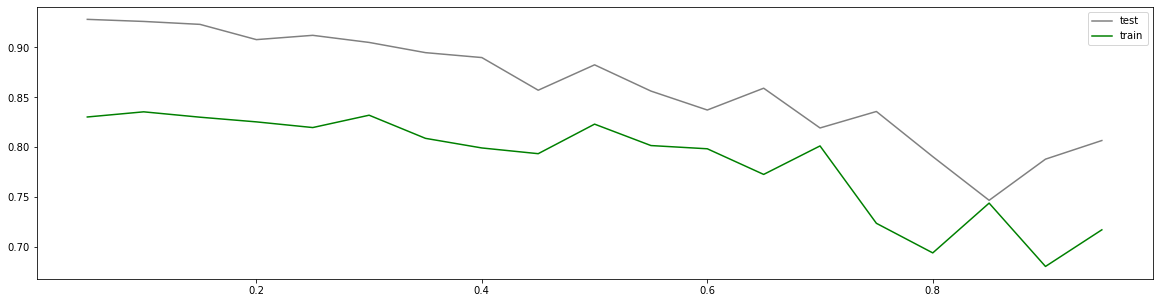

In [45]:
axisx = np.arange(0.05,1,0.05)
rs = []
te = []
for i in axisx:
    reg = XGBR(n_estimators=180,random_state=420,learning_rate=i)
    score = regassess(reg,Xtrain,Ytrain,cv,scoring = ["r2","neg_mean_squared_error"],show=False)
    test = reg.fit(Xtrain,Ytrain).score(Xtest,Ytest)
    rs.append(score[0])
    te.append(test)
print(axisx[rs.index(max(rs))],max(rs))
plt.figure(figsize=(20,5))
plt.plot(axisx,te,c="gray",label="test")
plt.plot(axisx,rs,c="green",label="train")
plt.legend()
plt.show()

In [46]:
for booster in ["gbtree","gblinear","dart"]:
    reg = XGBR(n_estimators=180
               ,learning_rate=0.1
               ,random_state=420
               ,booster=booster).fit(Xtrain,Ytrain)
    print(booster)
    print(reg.score(Xtest,Ytest))

gbtree
0.9260984298390122
gblinear
0.6500480552942092
dart
0.9260984373654244


In [47]:
#默认reg:linear
reg = XGBR(n_estimators=180,random_state=420).fit(Xtrain,Ytrain)
reg.score(Xtest, Ytest)

0.9050526024842831

In [48]:
MSE(Ytest,reg.predict(Xtest))

8.835224213421986

In [49]:
#xgb实现法
import xgboost as xgb

In [50]:
#使用类DMatrix读取数据
dtrain = xgb.DMatrix(Xtrain,Ytrain) #特征矩阵和标签都进行一个传入
dtest = xgb.DMatrix(Xtest,Ytest)

In [51]:
#非常遗憾无法打开来查看，所以通常都是先读到pandas里面查看之后再放到DMatrix中
dtrain

In [52]:
import pandas as pd

In [53]:
pd.DataFrame(Xtrain)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.03041,0.0,5.19,0.0,0.515,5.895,59.6,5.6150,5.0,224.0,20.2,394.81,10.56
1,0.04113,25.0,4.86,0.0,0.426,6.727,33.5,5.4007,4.0,281.0,19.0,396.90,5.29
2,10.23300,0.0,18.10,0.0,0.614,6.185,96.7,2.1705,24.0,666.0,20.2,379.70,18.03
3,0.17142,0.0,6.91,0.0,0.448,5.682,33.8,5.1004,3.0,233.0,17.9,396.90,10.21
4,0.05059,0.0,4.49,0.0,0.449,6.389,48.0,4.7794,3.0,247.0,18.5,396.90,9.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,0.03871,52.5,5.32,0.0,0.405,6.209,31.3,7.3172,6.0,293.0,16.6,396.90,7.14
350,0.12650,25.0,5.13,0.0,0.453,6.762,43.4,7.9809,8.0,284.0,19.7,395.58,9.50
351,6.96215,0.0,18.10,0.0,0.700,5.713,97.0,1.9265,24.0,666.0,20.2,394.43,17.11
352,0.09164,0.0,10.81,0.0,0.413,6.065,7.8,5.2873,4.0,305.0,19.2,390.91,5.52


In [54]:
#写明参数
param = {'silent':True #默认为False，通常要手动把它关闭掉
         ,'objective':'reg:linear'
         ,"eta":0.1}
num_round = 180 #n_estimators

In [55]:
#类train，可以直接导入的参数是训练数据，树的数量，其他参数都需要通过params来导入
bst = xgb.train(param, dtrain, num_round)

In [56]:
#接口predict
preds = bst.predict(dtest)

In [57]:
preds

array([ 6.4613175, 22.123888 , 30.755163 , 13.424351 ,  8.378565 ,
       23.608477 , 14.2151165, 16.026499 , 15.498961 , 14.10649  ,
       24.030867 , 34.36362  , 21.461111 , 28.839497 , 19.568035 ,
       10.188658 , 19.42369  , 23.539951 , 22.850523 , 23.198708 ,
       17.82486  , 16.07219  , 27.602034 , 20.773046 , 20.868807 ,
       15.865789 , 22.076588 , 29.292158 , 22.841051 , 15.770392 ,
       36.680496 , 21.057947 , 20.137005 , 23.777853 , 22.70615  ,
       23.863268 , 15.595315 , 24.565872 , 17.720552 , 33.95111  ,
       18.784286 , 20.483374 , 37.10668  , 18.068268 , 12.73839  ,
       31.186407 , 45.895035 , 12.696718 , 10.773068 , 36.064293 ,
       26.262571 , 19.908836 , 20.715096 , 48.814903 , 27.550056 ,
       25.225826 , 17.15366  , 21.215551 , 17.426773 , 18.478971 ,
       14.6453705, 22.841473 , 18.869593 , 29.990978 , 29.933191 ,
       18.756853 , 18.784918 , 16.33361  , 23.155968 , 19.144344 ,
       29.724382 , 42.121906 , 31.544363 , 23.017508 , 19.5360

In [58]:
from sklearn.metrics import r2_score
r2_score(Ytest,preds)

0.9260984298390122

In [60]:
MSE(Ytest,preds)

6.87682821415069

In [61]:
import xgboost as xgb

#为了便捷，使用全数据
dfull = xgb.DMatrix(X,y)

In [62]:
#设定参数
param1 = {'silent':True,'obj':'reg:linear',"gamma":0}
num_round = 100
n_fold=5 #sklearn - KFold

In [63]:
#使用类xgb.cv
time0 = time()
cvresult1 = xgb.cv(param1, dfull, num_round,n_fold)
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

00:00:781225


In [64]:
#看看类xgb.cv生成了什么结果？
cvresult1 #随着树不断增加，模型的效果如何变化

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,17.105578,0.129116,17.163215,0.584297
1,12.337973,0.097558,12.519735,0.473457
2,8.994071,0.065756,9.404534,0.472309
3,6.629481,0.050323,7.250335,0.500342
4,4.954406,0.033209,5.920812,0.591874
...,...,...,...,...
95,0.025204,0.005145,3.669921,0.858313
96,0.024422,0.005242,3.669984,0.858255
97,0.023661,0.005117,3.669947,0.858331
98,0.022562,0.004704,3.669868,0.858578


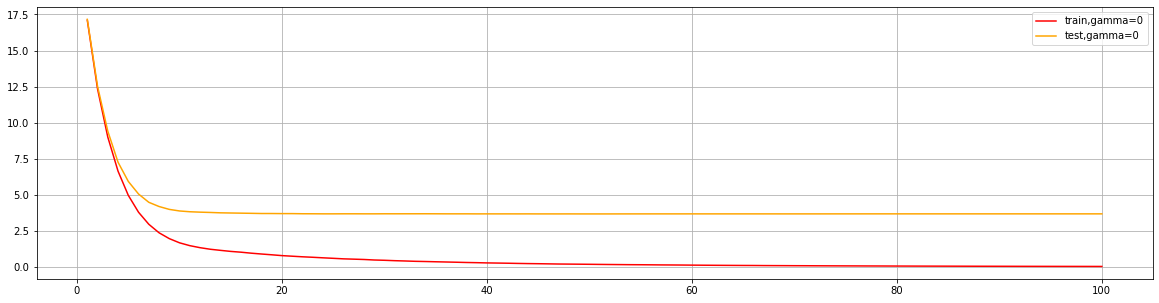

In [65]:
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(range(1,101),cvresult1.iloc[:,0],c="red",label="train,gamma=0")
plt.plot(range(1,101),cvresult1.iloc[:,2],c="orange",label="test,gamma=0")
plt.legend()
plt.show()

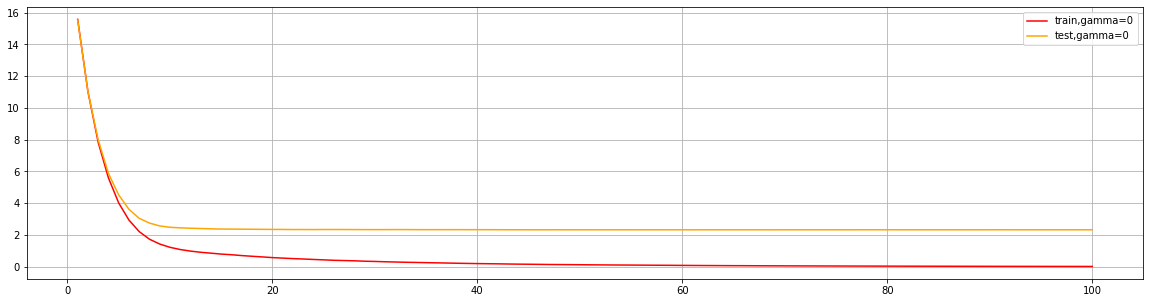

In [67]:
param1 = {'silent':True,'obj':'reg:linear',"gamma":0,"eval_metric":"mae"}
cvresult1 = xgb.cv(param1, dfull, num_round,n_fold)

plt.figure(figsize=(20,5))
plt.grid()
plt.plot(range(1,101),cvresult1.iloc[:,0],c="red",label="train,gamma=0")
plt.plot(range(1,101),cvresult1.iloc[:,2],c="orange",label="test,gamma=0")
plt.legend()
plt.show()

In [68]:
param1 = {'silent':True,'obj':'reg:linear',"gamma":0}
param2 = {'silent':True,'obj':'reg:linear',"gamma":20}
num_round = 180
n_fold=5

time0 = time()
cvresult1 = xgb.cv(param1, dfull, num_round,n_fold)
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

00:01:488302


In [69]:
time0 = time()
cvresult2 = xgb.cv(param2, dfull, num_round,n_fold)
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

00:01:482192


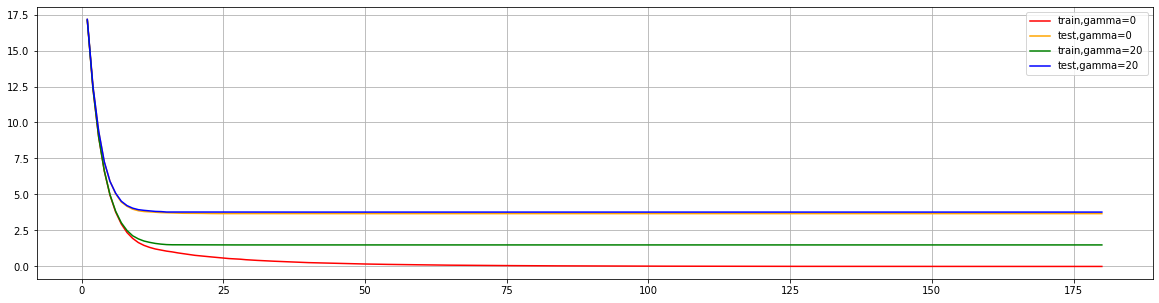

In [70]:
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(range(1,181),cvresult1.iloc[:,0],c="red",label="train,gamma=0")
plt.plot(range(1,181),cvresult1.iloc[:,2],c="orange",label="test,gamma=0")
plt.plot(range(1,181),cvresult2.iloc[:,0],c="green",label="train,gamma=20")
plt.plot(range(1,181),cvresult2.iloc[:,2],c="blue",label="test,gamma=20")
plt.legend()
plt.show()

#从这里，你看出gamma是如何控制过拟合了吗？控制训练集上的训练 - 降低训练集上的表现

In [71]:
import xgboost as xgb
import matplotlib.pyplot as plt
from time import time
import datetime

In [72]:
from sklearn.datasets import load_breast_cancer
data2 = load_breast_cancer()

x2 = data2.data
y2 = data2.target

dfull2 = xgb.DMatrix(x2,y2)

param1 = {'silent':True,'obj':'binary:logistic',"gamma":0,"nfold":5
          ,"eval_metrics":"error"
         }
param2 = {'silent':True,'obj':'binary:logistic',"gamma":1,"nfold":5}
num_round = 100

In [73]:
time0 = time()
cvresult1 = xgb.cv(param1, dfull2, num_round,metrics=("error"))
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

00:00:703412


In [74]:
time0 = time()
cvresult2 = xgb.cv(param2, dfull2, num_round,metrics=("error")) 
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

00:01:285099


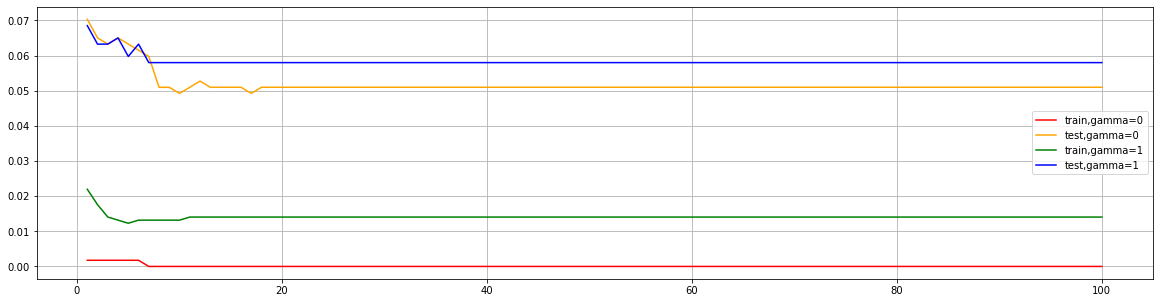

In [75]:
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(range(1,101),cvresult1.iloc[:,0],c="red",label="train,gamma=0")
plt.plot(range(1,101),cvresult1.iloc[:,2],c="orange",label="test,gamma=0")
plt.plot(range(1,101),cvresult2.iloc[:,0],c="green",label="train,gamma=1")
plt.plot(range(1,101),cvresult2.iloc[:,2],c="blue",label="test,gamma=1")
plt.legend()
plt.show()

In [76]:
dfull = xgb.DMatrix(X,y)

param1 = {'silent':True
          ,'obj':'reg:linear'
          ,"subsample":1
          ,"max_depth":6
          ,"eta":0.3
          ,"gamma":0
          ,"lambda":1
          ,"alpha":0
          ,"colsample_bytree":1
          ,"colsample_bylevel":1
          ,"colsample_bynode":1
          ,"nfold":5}
num_round = 200

00:00:982281


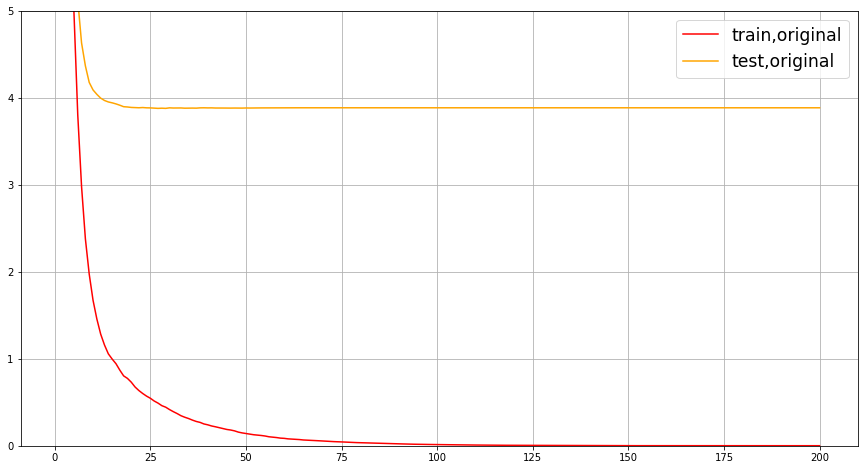

In [77]:
time0 = time()
cvresult1 = xgb.cv(param1, dfull, num_round)
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

fig,ax = plt.subplots(1,figsize=(15,8))
ax.set_ylim(top=5)
ax.grid()
ax.plot(range(1,201),cvresult1.iloc[:,0],c="red",label="train,original")
ax.plot(range(1,201),cvresult1.iloc[:,2],c="orange",label="test,original")
ax.legend(fontsize="xx-large")
plt.show()

00:01:104417
00:00:453505
00:00:516848


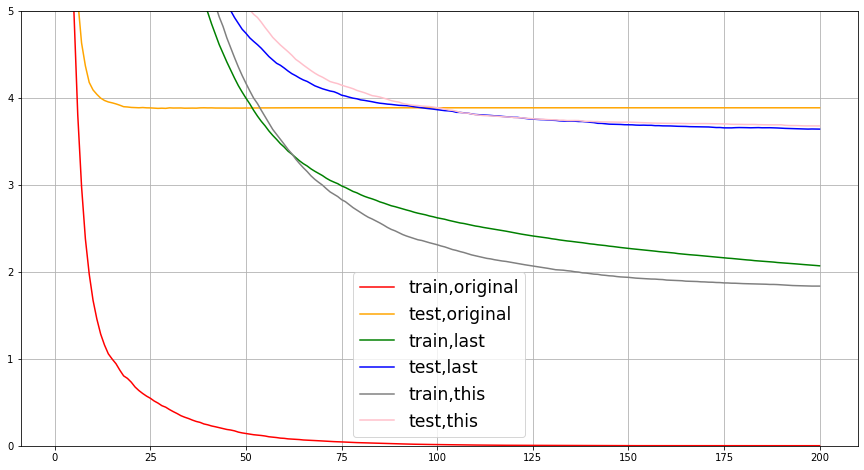

In [78]:
param1 = {'silent':True
          ,'obj':'reg:linear'
          ,"subsample":1
          ,"max_depth":6
          ,"eta":0.3
          ,"gamma":0
          ,"lambda":1
          ,"alpha":0
          ,"colsample_bytree":1
          ,"colsample_bylevel":1
          ,"colsample_bynode":1
          ,"nfold":5}
num_round = 200

time0 = time()
cvresult1 = xgb.cv(param1, dfull, num_round)
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

fig,ax = plt.subplots(1,figsize=(15,8))
ax.set_ylim(top=5)
ax.grid()
ax.plot(range(1,201),cvresult1.iloc[:,0],c="red",label="train,original")
ax.plot(range(1,201),cvresult1.iloc[:,2],c="orange",label="test,original")

param2 = {'silent':True
          ,'obj':'reg:linear'
          ,"max_depth":2
          ,"eta":0.05
          ,"gamma":0
          ,"lambda":1
          ,"alpha":0
          ,"colsample_bytree":1
          ,"colsample_bylevel":0.4
          ,"colsample_bynode":1
          ,"nfold":5}

param3 = {'silent':True
          ,'obj':'reg:linear'
          ,"subsample":1
          ,"eta":0.05
          ,"gamma":20
          ,"lambda":3.5
          ,"alpha":0.2
          ,"max_depth":4
          ,"colsample_bytree":0.4
          ,"colsample_bylevel":0.6
          ,"colsample_bynode":1
          ,"nfold":5}

time0 = time()
cvresult2 = xgb.cv(param2, dfull, num_round)
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

time0 = time()
cvresult3 = xgb.cv(param3, dfull, num_round)
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

ax.plot(range(1,201),cvresult2.iloc[:,0],c="green",label="train,last")
ax.plot(range(1,201),cvresult2.iloc[:,2],c="blue",label="test,last")
ax.plot(range(1,201),cvresult3.iloc[:,0],c="gray",label="train,this")
ax.plot(range(1,201),cvresult3.iloc[:,2],c="pink",label="test,this")
ax.legend(fontsize="xx-large")
plt.show()

In [79]:
import pickle

In [80]:
dtrain = xgb.DMatrix(Xtrain,Ytrain)

#设定参数，对模型进行训练
param = {'silent':True
          ,'obj':'reg:linear'
          ,"subsample":1
          ,"eta":0.05
          ,"gamma":20
          ,"lambda":3.5
          ,"alpha":0.2
          ,"max_depth":4
          ,"colsample_bytree":0.4
          ,"colsample_bylevel":0.6
          ,"colsample_bynode":1}
num_round = 180

bst = xgb.train(param, dtrain, num_round)

In [81]:
#保存模型
pickle.dump(bst, open("xgboostonboston.dat","wb"))

#注意，open中往往使用w或者r作为读取的模式，但其实w与r只能用于文本文件 - txt
#当希望导入的不是文本文件，而是模型本身的时候，使用"wb"和"rb"作为读取的模式
#其中wb表示以二进制写入，rb表示以二进制读入，使用open进行保存的这个文件中是一个可以进行读取或者调用的模型

In [82]:
#看看模型被保存到了哪里？
import sys
sys.path

['H:\\AI\\AI_Resource\\MachineLearningWithSklearn\\XGboost',
 'h:\\ai\\aienv\\pytorch1x\\scripts\\python37.zip',
 'f:\\pythonai\\DLLs',
 'f:\\pythonai\\lib',
 'f:\\pythonai',
 'h:\\ai\\aienv\\pytorch1x',
 '',
 'h:\\ai\\aienv\\pytorch1x\\lib\\site-packages',
 'h:\\ai\\aienv\\pytorch1x\\lib\\site-packages\\win32',
 'h:\\ai\\aienv\\pytorch1x\\lib\\site-packages\\win32\\lib',
 'h:\\ai\\aienv\\pytorch1x\\lib\\site-packages\\Pythonwin',
 'h:\\ai\\aienv\\pytorch1x\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\MSWQPC\\.ipython']

In [1]:
#重新打开jupyter notebook

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split as TTS
from sklearn.metrics import mean_squared_error as MSE
import pickle
import xgboost as xgb

data = load_boston()

X = data.data
y = data.target

Xtrain,Xtest,Ytrain,Ytest = TTS(X,y,test_size=0.3,random_state=420)

In [2]:
#注意，如果保存的模型是xgboost库中建立的模型，则导入的数据类型也必须是xgboost库中的数据类型
dtest = xgb.DMatrix(Xtest,Ytest)

In [3]:
#导入模型
loaded_model = pickle.load(open("xgboostonboston.dat", "rb"))
print("Loaded model from: xgboostonboston.dat")

Loaded model from: xgboostonboston.dat


In [4]:
#预测，直接调用接口predict
ypreds = loaded_model.predict(dtest)

In [5]:
ypreds

array([ 9.278189 , 22.73411  , 29.49379  , 12.983151 ,  9.501983 ,
       20.643223 , 15.9423685, 15.831041 , 15.698413 , 15.967682 ,
       21.101307 , 35.83475  , 20.486403 , 29.231373 , 20.785269 ,
       12.0639305, 17.63428  , 26.05238  , 25.247683 , 23.5034   ,
       18.007511 , 16.483337 , 25.402018 , 22.421213 , 20.117733 ,
       16.29774  , 21.58729  , 25.936457 , 23.091265 , 16.585096 ,
       35.397484 , 20.128452 , 20.370457 , 23.711695 , 23.2132   ,
       24.522053 , 16.185253 , 23.857044 , 18.047995 , 34.886375 ,
       17.50002  , 21.3877   , 33.375374 , 18.835121 , 15.2021055,
       28.557238 , 42.05484  , 16.839178 , 10.032376 , 37.126007 ,
       26.214668 , 21.136719 , 20.564241 , 47.079376 , 27.928053 ,
       25.919254 , 18.91586  , 20.737247 , 17.17016  , 18.296001 ,
       15.074966 , 23.753801 , 19.82896  , 31.379152 , 29.385721 ,
       20.15055  , 20.94952  , 17.336159 , 22.490997 , 16.978096 ,
       28.754507 , 40.5415   , 30.079725 , 22.954508 , 20.1310

In [6]:
from sklearn.metrics import mean_squared_error as MSE, r2_score
MSE(Ytest,ypreds)

9.17837612641537

In [7]:
r2_score(Ytest,ypreds)

0.9013649336369249

In [9]:
#写明参数
param = {'silent':True #默认为False，通常要手动把它关闭掉
         ,'objective':'reg:linear'
         ,"eta":0.1}
num_round = 180 #n_estimators

In [11]:
from sklearn.datasets import load_boston

In [12]:
data = load_boston()
X = data.data
y = data.target

In [13]:
from sklearn.model_selection import train_test_split as TTS
Xtrain,Xtest,Ytrain,Ytest = TTS(X,y,test_size=0.3,random_state=420)

In [14]:
dtrain = xgb.DMatrix(Xtrain,Ytrain)

In [15]:
bst = xgb.train(param, dtrain, num_round)

In [16]:
import joblib

#同样可以看看模型被保存到了哪里
joblib.dump(bst,"xgboost-boston.dat")

['xgboost-boston.dat']

In [17]:
loaded_model = joblib.load("xgboost-boston.dat")

In [18]:
dtest = xgb.DMatrix(Xtest,Ytest)
ypreds = loaded_model.predict(dtest)

In [19]:
ypreds

array([ 6.4613175, 22.123888 , 30.755163 , 13.424351 ,  8.378565 ,
       23.608477 , 14.2151165, 16.026499 , 15.498961 , 14.10649  ,
       24.030867 , 34.36362  , 21.461111 , 28.839497 , 19.568035 ,
       10.188658 , 19.42369  , 23.539951 , 22.850523 , 23.198708 ,
       17.82486  , 16.07219  , 27.602034 , 20.773046 , 20.868807 ,
       15.865789 , 22.076588 , 29.292158 , 22.841051 , 15.770392 ,
       36.680496 , 21.057947 , 20.137005 , 23.777853 , 22.70615  ,
       23.863268 , 15.595315 , 24.565872 , 17.720552 , 33.95111  ,
       18.784286 , 20.483374 , 37.10668  , 18.068268 , 12.73839  ,
       31.186407 , 45.895035 , 12.696718 , 10.773068 , 36.064293 ,
       26.262571 , 19.908836 , 20.715096 , 48.814903 , 27.550056 ,
       25.225826 , 17.15366  , 21.215551 , 17.426773 , 18.478971 ,
       14.6453705, 22.841473 , 18.869593 , 29.990978 , 29.933191 ,
       18.756853 , 18.784918 , 16.33361  , 23.155968 , 19.144344 ,
       29.724382 , 42.121906 , 31.544363 , 23.017508 , 19.5360

In [20]:
MSE(Ytest, ypreds)

6.87682821415069

In [21]:
r2_score(Ytest,ypreds)

0.9260984298390122

In [22]:
#使用sklearn中的模型
from xgboost import XGBRegressor as XGBR

bst = XGBR(n_estimators=200
           ,eta=0.05,gamma=20
           ,reg_lambda=3.5
           ,reg_alpha=0.2
           ,max_depth=4
           ,colsample_bytree=0.4
           ,colsample_bylevel=0.6).fit(Xtrain,Ytrain) #训练完毕

In [23]:
joblib.dump(bst,"xgboost-boston-sklearn.dat")

['xgboost-boston-sklearn.dat']

In [24]:
loaded_model = joblib.load("xgboost-boston-sklearn.dat")

In [25]:
ypreds = loaded_model.predict(Xtest)

In [26]:
Xtest

array([[4.15292e+01, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.29460e+02, 2.73800e+01],
       [2.73100e-02, 0.00000e+00, 7.07000e+00, ..., 1.78000e+01,
        3.96900e+02, 9.14000e+00],
       [3.15000e-02, 9.50000e+01, 1.47000e+00, ..., 1.70000e+01,
        3.96900e+02, 4.56000e+00],
       ...,
       [5.08300e-02, 0.00000e+00, 5.19000e+00, ..., 2.02000e+01,
        3.89710e+02, 5.68000e+00],
       [3.77498e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        2.20100e+01, 1.71500e+01],
       [1.96091e+01, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.96900e+02, 1.34400e+01]])

In [27]:
dtest

In [28]:
ypreds

array([ 9.209096 , 22.705729 , 29.492292 , 12.896596 ,  9.380931 ,
       20.598948 , 15.930351 , 15.803484 , 15.6708555, 15.96494  ,
       21.098568 , 35.83325  , 20.443174 , 29.229876 , 20.717224 ,
       12.092506 , 17.787989 , 26.038475 , 25.238808 , 23.554081 ,
       17.959902 , 16.41529  , 25.361229 , 22.430357 , 20.073458 ,
       16.253464 , 21.560781 , 26.077642 , 23.089767 , 16.538534 ,
       35.388603 , 20.125713 , 20.407557 , 23.72156  , 23.204325 ,
       24.52454  , 16.11616  , 23.840025 , 18.02044  , 34.884872 ,
       17.455744 , 21.375666 , 33.33458  , 18.818802 , 15.237378 ,
       28.55574  , 42.144    , 17.188316 , 10.274555 , 37.110027 ,
       26.213171 , 21.206905 , 20.553148 , 47.063396 , 27.926361 ,
       25.937069 , 18.871584 , 20.754015 , 17.125885 , 18.293262 ,
       15.072225 , 23.72542  , 19.820786 , 31.370277 , 29.376846 ,
       20.147812 , 20.909626 , 17.267067 , 22.507765 , 16.909004 ,
       28.764372 , 40.577892 , 30.116125 , 22.956995 , 20.0867

In [29]:
MSE(Ytest, ypreds)

9.188186655183586

In [30]:
r2_score(Ytest,ypreds)

0.9012595051664872

In [31]:
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from xgboost import XGBClassifier as XGBC
from sklearn.datasets import make_blobs #自创数据集
from sklearn.model_selection import train_test_split as TTS
from sklearn.metrics import confusion_matrix as cm, recall_score as recall, roc_auc_score as auc

In [32]:
class_1 = 500 #类别1有500个样本
class_2 = 50 #类别2只有50个
centers = [[0.0, 0.0], [2.0, 2.0]] #设定两个类别的中心
clusters_std = [1.5, 0.5] #设定两个类别的方差，通常来说，样本量比较大的类别会更加松散
X, y = make_blobs(n_samples=[class_1, class_2],
                  centers=centers,
                  cluster_std=clusters_std,
                  random_state=0, shuffle=False)

In [33]:
X.shape

(550, 2)

In [34]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [35]:
(y == 1).sum() / y.shape[0] 

0.09090909090909091

In [36]:
Xtrain, Xtest, Ytrain, Ytest = TTS(X,y,test_size=0.3,random_state=420)

In [37]:
#在sklearn下建模

clf = XGBC().fit(Xtrain,Ytrain)
ypred = clf.predict(Xtest)

In [38]:
ypred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1])

In [39]:
clf.score(Xtest,Ytest) #默认模型评估指标 - 准确率

0.9272727272727272

In [40]:
cm(Ytest,ypred,labels=[1,0]) #注意：少数类写在前面

array([[  9,   4],
       [  8, 144]], dtype=int64)

In [41]:
recall(Ytest,ypred)

0.6923076923076923

In [42]:
auc(Ytest,clf.predict_proba(Xtest)[:,1])

0.9701417004048585

In [43]:
#负/正样本比例
clf_ = XGBC(scale_pos_weight=10).fit(Xtrain,Ytrain)
ypred_ = clf_.predict(Xtest)
clf_.score(Xtest,Ytest)

0.9333333333333333

In [44]:
cm(Ytest,ypred_,labels=[1,0])

array([[ 10,   3],
       [  8, 144]], dtype=int64)

In [45]:
recall(Ytest,ypred_)

0.7692307692307693

In [46]:
auc(Ytest,clf_.predict_proba(Xtest)[:,1])

0.9696356275303644

In [47]:
#随着样本权重逐渐增加，模型的recall,auc和准确率如何变化？
for i in [1,5,10,20,30]:
    clf_ = XGBC(scale_pos_weight=i).fit(Xtrain,Ytrain)
    ypred_ = clf_.predict(Xtest)
    print(i)
    print("\tAccuracy:{}".format(clf_.score(Xtest,Ytest)))
    print("\tRecall:{}".format(recall(Ytest,ypred_)))
    print("\tAUC:{}".format(auc(Ytest,clf_.predict_proba(Xtest)[:,1])))

1
	Accuracy:0.9272727272727272
	Recall:0.6923076923076923
	AUC:0.9701417004048585
5
	Accuracy:0.9393939393939394
	Recall:0.8461538461538461
	AUC:0.9660931174089069
10
	Accuracy:0.9333333333333333
	Recall:0.7692307692307693
	AUC:0.9696356275303644
20
	Accuracy:0.9333333333333333
	Recall:0.7692307692307693
	AUC:0.9686234817813765
30
	Accuracy:0.9393939393939394
	Recall:0.8461538461538461
	AUC:0.9701417004048583


In [48]:
#负/正样本比例
clf_ = XGBC(scale_pos_weight=20).fit(Xtrain,Ytrain)
ypred_ = clf_.predict(Xtest)
clf_.score(Xtest,Ytest)

0.9333333333333333

In [49]:
cm(Ytest,ypred_,labels=[1,0])

array([[ 10,   3],
       [  8, 144]], dtype=int64)

In [50]:
recall(Ytest,ypred_)

0.7692307692307693

In [51]:
auc(Ytest,clf_.predict_proba(Xtest)[:,1])

0.9686234817813765

In [52]:
dtrain = xgb.DMatrix(Xtrain,Ytrain)
dtest = xgb.DMatrix(Xtest,Ytest)

In [53]:
#看看xgboost库自带的predict接口
param = {'silent':True,'objective':'binary:logistic',"eta":0.1,"scale_pos_weight":1}
num_round = 100

In [54]:
bst = xgb.train(param, dtrain, num_round)

In [55]:
preds = bst.predict(dtest)

In [56]:
preds

array([0.00110357, 0.00761518, 0.00110357, 0.00110357, 0.93531454,
       0.00466839, 0.00110357, 0.00110357, 0.00110357, 0.00110357,
       0.00110357, 0.00410493, 0.00454478, 0.00571528, 0.00751026,
       0.00110357, 0.00110357, 0.00110357, 0.00110357, 0.00110357,
       0.00110357, 0.00110357, 0.00110357, 0.00110357, 0.00110357,
       0.00712637, 0.00110357, 0.00110357, 0.00110357, 0.00110357,
       0.00110357, 0.00110357, 0.00110357, 0.00793251, 0.00466839,
       0.00110357, 0.00339395, 0.00657186, 0.00110357, 0.00457053,
       0.00571528, 0.0026763 , 0.00110357, 0.00110357, 0.00110357,
       0.00884932, 0.00712637, 0.00110357, 0.00712637, 0.00466839,
       0.00110357, 0.00110357, 0.00712637, 0.00110357, 0.00110357,
       0.00110357, 0.00110357, 0.63748044, 0.00110357, 0.00793251,
       0.00110357, 0.00451971, 0.00644181, 0.00110357, 0.00110357,
       0.00110357, 0.00110357, 0.00751026, 0.00712637, 0.00110357,
       0.00866458, 0.00110357, 0.00110357, 0.00110357, 0.91610

In [57]:
#自己设定阈值
ypred = preds.copy()

In [60]:
ypred[preds > 0.5] = 1

In [61]:
ypred

array([0.00110357, 0.00761518, 0.00110357, 0.00110357, 1.        ,
       0.00466839, 0.00110357, 0.00110357, 0.00110357, 0.00110357,
       0.00110357, 0.00410493, 0.00454478, 0.00571528, 0.00751026,
       0.00110357, 0.00110357, 0.00110357, 0.00110357, 0.00110357,
       0.00110357, 0.00110357, 0.00110357, 0.00110357, 0.00110357,
       0.00712637, 0.00110357, 0.00110357, 0.00110357, 0.00110357,
       0.00110357, 0.00110357, 0.00110357, 0.00793251, 0.00466839,
       0.00110357, 0.00339395, 0.00657186, 0.00110357, 0.00457053,
       0.00571528, 0.0026763 , 0.00110357, 0.00110357, 0.00110357,
       0.00884932, 0.00712637, 0.00110357, 0.00712637, 0.00466839,
       0.00110357, 0.00110357, 0.00712637, 0.00110357, 0.00110357,
       0.00110357, 0.00110357, 1.        , 0.00110357, 0.00793251,
       0.00110357, 0.00451971, 0.00644181, 0.00110357, 0.00110357,
       0.00110357, 0.00110357, 0.00751026, 0.00712637, 0.00110357,
       0.00866458, 0.00110357, 0.00110357, 0.00110357, 1.     

In [62]:
ypred[ypred != 1] = 0

In [63]:
#写明参数
scale_pos_weight = [1,5,10]
names = ["negative vs positive: 1"
         ,"negative vs positive: 5"
         ,"negative vs positive: 10"]

In [64]:
[*zip(names,scale_pos_weight)]

[('negative vs positive: 1', 1),
 ('negative vs positive: 5', 5),
 ('negative vs positive: 10', 10)]

In [65]:
#导入模型评估指标
from sklearn.metrics import accuracy_score as accuracy, recall_score as recall, roc_auc_score as auc

for name,i in zip(names,scale_pos_weight):
    param = {'silent':True,'objective':'binary:logistic'
            ,"eta":0.1,"scale_pos_weight":i}
    num_round = 100
    clf = xgb.train(param, dtrain, num_round)
    preds = clf.predict(dtest)
    ypred = preds.copy()
    ypred[preds > 0.5] = 1
    ypred[ypred != 1] = 0
    print(name)
    print("\tAccuracy:{}".format(accuracy(Ytest,ypred)))
    print("\tRecall:{}".format(recall(Ytest,ypred)))
    print("\tAUC:{}".format(auc(Ytest,preds)))

negative vs positive: 1
	Accuracy:0.9272727272727272
	Recall:0.6923076923076923
	AUC:0.9741902834008097
negative vs positive: 5
	Accuracy:0.9393939393939394
	Recall:0.8461538461538461
	AUC:0.9635627530364372
negative vs positive: 10
	Accuracy:0.9515151515151515
	Recall:1.0
	AUC:0.9665991902834008


In [66]:
#当然也可以尝试不同的阈值
for name,i in zip(names,scale_pos_weight):
    for thres in [0.3,0.5,0.7,0.9]:
        param= {'silent':True,'objective':'binary:logistic'
                ,"eta":0.1,"scale_pos_weight":i}
        clf = xgb.train(param, dtrain, num_round)
        preds = clf.predict(dtest)
        ypred = preds.copy()
        ypred[preds > thres] = 1
        ypred[ypred != 1] = 0
        print("{},thresholds:{}".format(name,thres))
        print("\tAccuracy:{}".format(accuracy(Ytest,ypred)))
        print("\tRecall:{}".format(recall(Ytest,ypred)))
        print("\tAUC:{}".format(auc(Ytest,preds)))

negative vs positive: 1,thresholds:0.3
	Accuracy:0.9393939393939394
	Recall:0.8461538461538461
	AUC:0.9741902834008097
negative vs positive: 1,thresholds:0.5
	Accuracy:0.9272727272727272
	Recall:0.6923076923076923
	AUC:0.9741902834008097
negative vs positive: 1,thresholds:0.7
	Accuracy:0.9212121212121213
	Recall:0.6153846153846154
	AUC:0.9741902834008097
negative vs positive: 1,thresholds:0.9
	Accuracy:0.9515151515151515
	Recall:0.5384615384615384
	AUC:0.9741902834008097
negative vs positive: 5,thresholds:0.3
	Accuracy:0.9515151515151515
	Recall:1.0
	AUC:0.9635627530364372
negative vs positive: 5,thresholds:0.5
	Accuracy:0.9393939393939394
	Recall:0.8461538461538461
	AUC:0.9635627530364372
negative vs positive: 5,thresholds:0.7
	Accuracy:0.9272727272727272
	Recall:0.6923076923076923
	AUC:0.9635627530364372
negative vs positive: 5,thresholds:0.9
	Accuracy:0.9212121212121213
	Recall:0.6153846153846154
	AUC:0.9635627530364372
negative vs positive: 10,thresholds:0.3
	Accuracy:0.95151515151